In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

### Basic

In [3]:
df_max1 = pd.read_csv('data_basic/data_max1.csv')
df_max2 = pd.read_csv('data_basic/data_max2.csv')
df_max3 = pd.read_csv('data_basic/data_max3.csv')

df_mean1 = pd.read_csv('data_basic/data_mean1.csv')
df_mean2 = pd.read_csv('data_basic/data_mean2.csv')
df_mean3 = pd.read_csv('data_basic/data_mean3.csv')

df_n1 = pd.read_csv('data_basic/data_n1.csv')
df_n2 = pd.read_csv('data_basic/data_n2.csv')
df_n3 = pd.read_csv('data_basic/data_n3.csv')

df_sum1 = pd.read_csv('data_basic/data_sum1.csv')
df_sum2 = pd.read_csv('data_basic/data_sum2.csv')
df_sum3 = pd.read_csv('data_basic/data_sum3.csv')


In [4]:
columns=df_max1.columns
indecies=df_max1.index
new_max_data=dict()
new_mean_data=dict()
new_n_data=dict()
new_sum_data=dict()
for column in columns:
    new_max_column=dict()
    new_mean_column=dict()
    new_n_column=dict()
    new_sum_column=dict()
    for index in indecies:
        new_max_column[index]=np.mean([df_max1[column][index], df_max2[column][index], df_max3[column][index]])
        new_mean_column[index]=np.mean([df_mean1[column][index], df_mean2[column][index], df_mean3[column][index]])
        new_n_column[index]=np.mean([df_n1[column][index], df_n2[column][index], df_n3[column][index]])
        new_sum_column[index]=np.mean([df_sum1[column][index], df_sum2[column][index], df_sum3[column][index]])
    new_max_data[column]=new_max_column
    new_mean_data[column]=new_mean_column
    new_n_data[column]=new_n_column
    new_sum_data[column]=new_sum_column

In [5]:
df_max_avg=pd.DataFrame(new_max_data)
df_mean_avg=pd.DataFrame(new_mean_data)
df_n_avg=pd.DataFrame(new_n_data)
df_sum_avg=pd.DataFrame(new_sum_data)

In [6]:
df_max_avg=df_max_avg.round(2)
df_mean_avg=df_mean_avg.round(2)
df_n_avg=df_n_avg.round(2)
df_sum_avg=df_sum_avg.round(2)

In [7]:
# df_max_avg.to_csv("data_basic/data_maxavg.csv")
# df_mean_avg.to_csv("data_basic/data_meanavg.csv")
# df_n_avg.to_csv("data_basic/data_navg.csv")
# df_sum_avg.to_csv("data_basic/data_sumavg.csv")

In [8]:
new_columns={"P"+str(i):"Rozwiązanie "+str(i) for i in range (1,7)}
df_max_avg=df_max_avg.rename(columns=new_columns)
df_mean_avg=df_mean_avg.rename(columns=new_columns)
df_n_avg=df_n_avg.rename(columns=new_columns)
df_sum_avg=df_sum_avg.rename(columns=new_columns)

In [9]:
colors = ['indianred', 'burlywood', 'gold', 'seagreen', 'deepskyblue', 'mediumpurple']

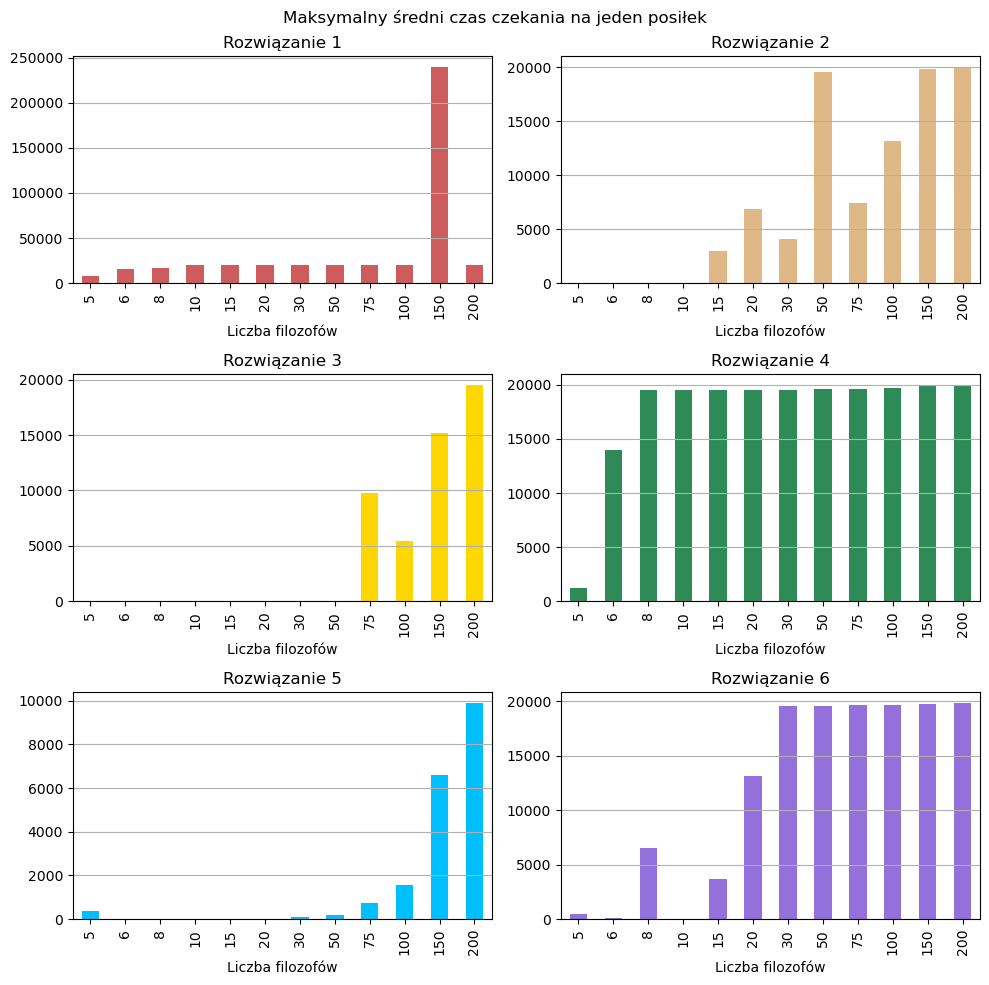

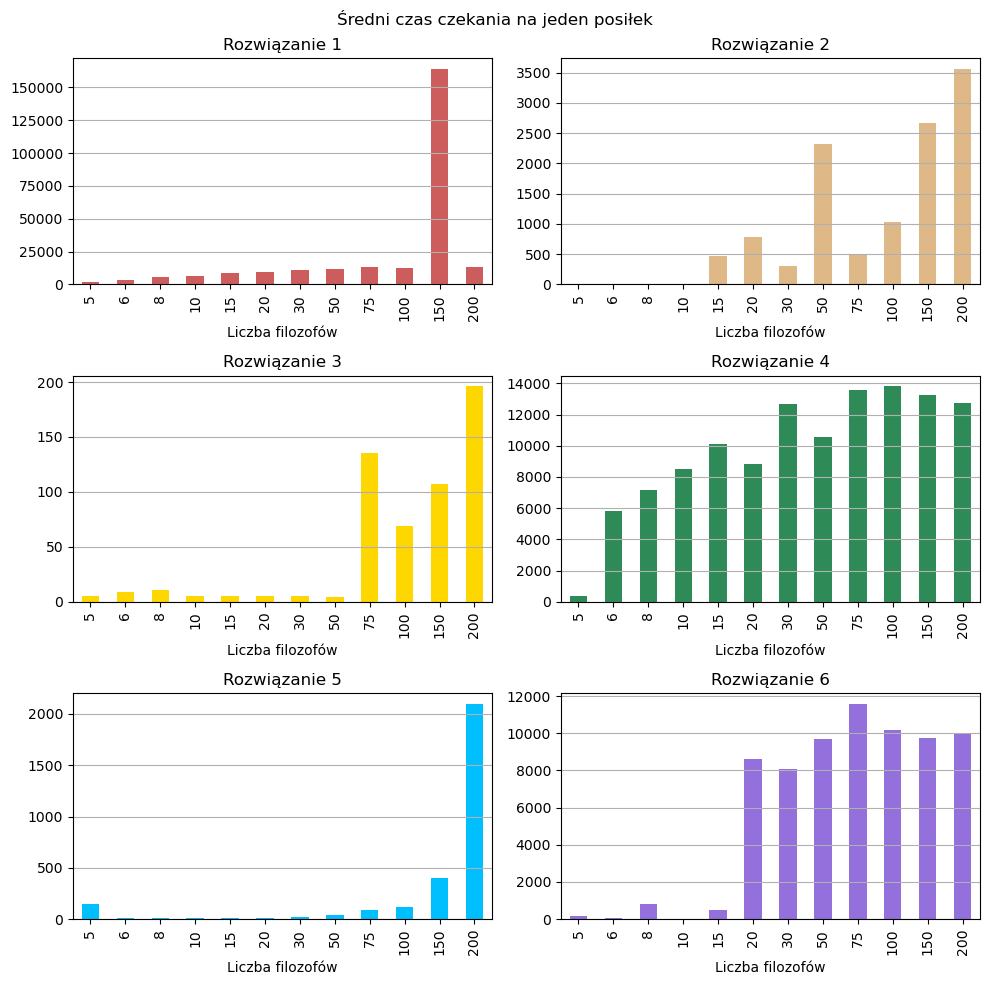

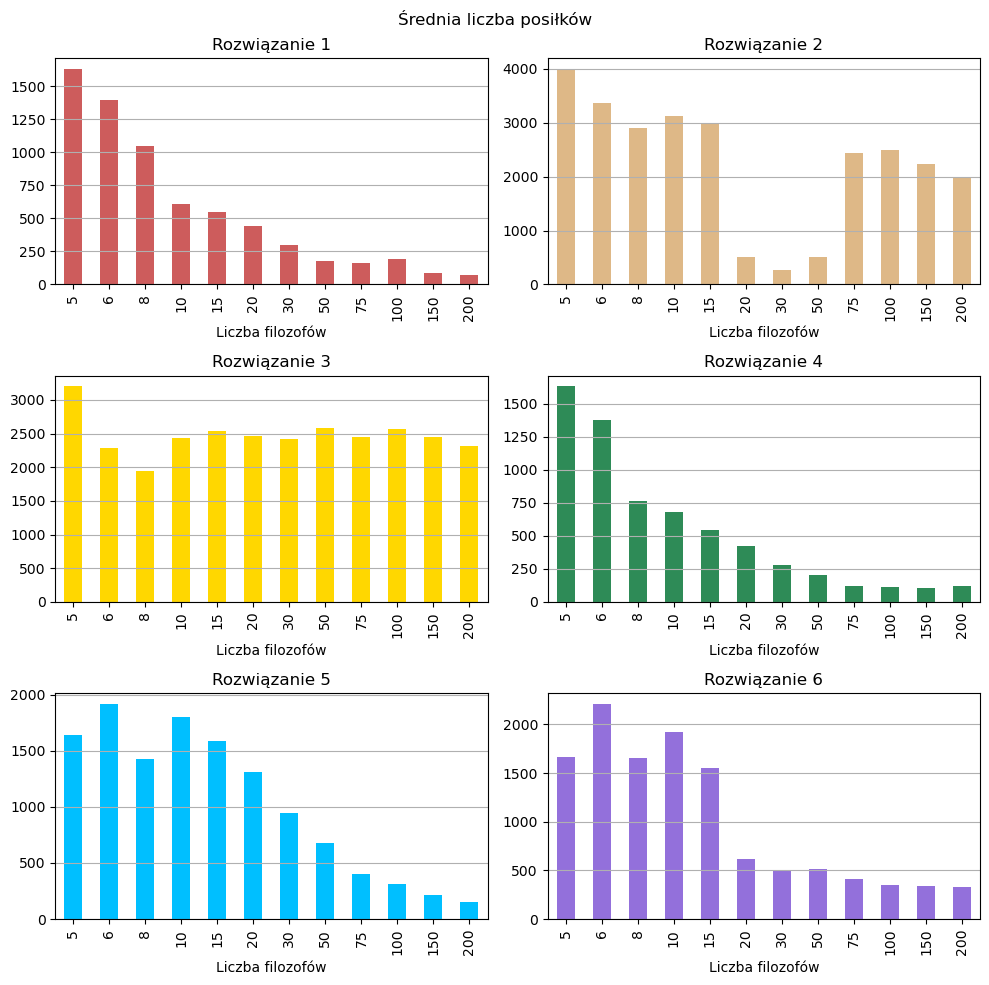

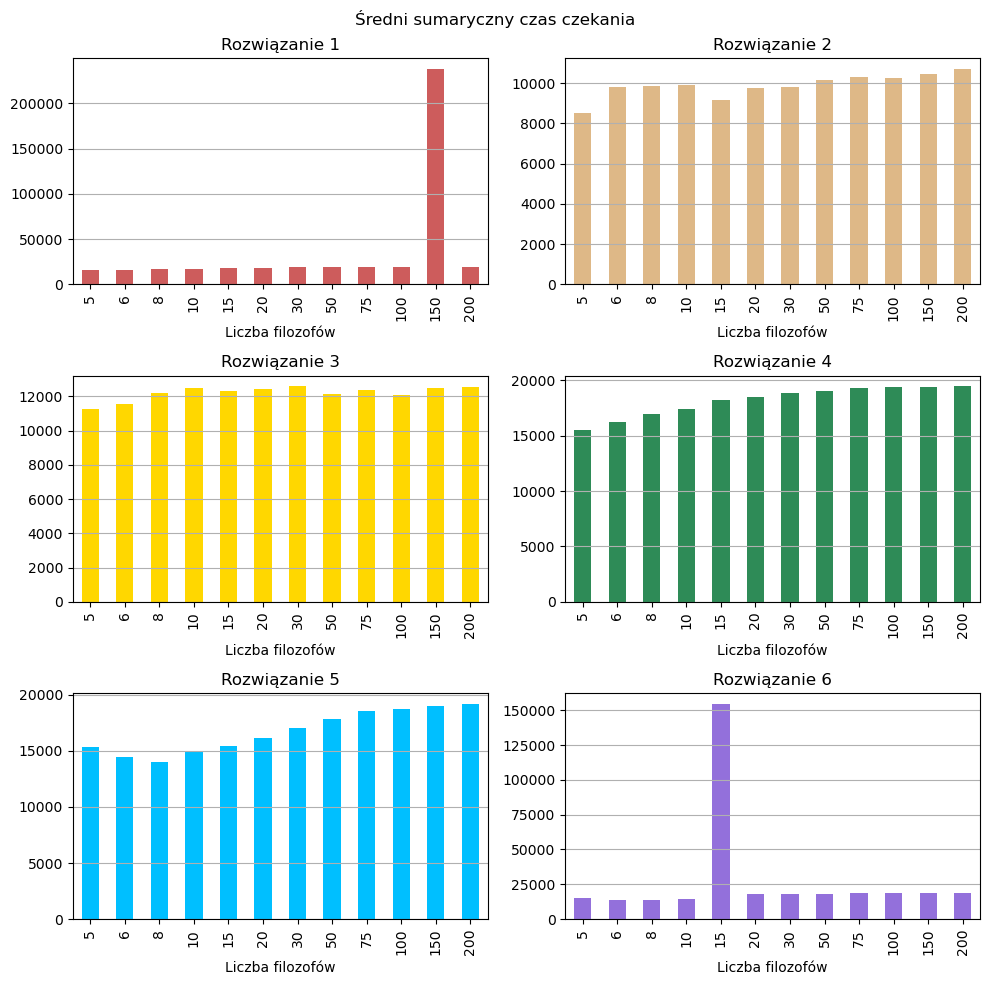

In [16]:
for df, title, file in ((df_max_avg, "Maksymalny średni czas czekania na jeden posiłek", "max"), (df_mean_avg, "Średni czas czekania na jeden posiłek", "mean"), (df_n_avg, "Średnia liczba posiłków", "n"), (df_sum_avg, "Średni sumaryczny czas czekania", "sum")):
    fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(10,10))
    fig.suptitle(title)
    for i, col in enumerate(df.columns):
        bars=df[col].plot(ax=axes[i//2, i%2], kind='bar', color=colors[i])
        axes[i//2, i%2].set_title(col)
        axes[i//2, i%2].set_xlabel("Liczba filozofów")
        axes[i//2, i%2].yaxis.grid(True)
    fig.tight_layout()
    plt.savefig("plots/barplot_"+file+".png")
    

In [12]:
df_max_avg.to_excel("tables/basic_max_vals.xlsx")
df_mean_avg.to_excel("tables/basic_means.xlsx")
df_n_avg.to_excel("tables/basic_n.xlsx")
df_sum_avg.to_excel("tables/basic_sum.xlsx")

### Complex

In [13]:
data_complex=[[None for _ in range (6)] for i in range (3)]
for philosopher in range (6):
    for i, n in enumerate([5,20,100]):
        name='data_complex/data_wt_'+str(philosopher)+'_'+str(n)+'.csv'
        data_complex[i][philosopher]=pd.read_csv(name, header=None).to_numpy().reshape((-1))


In [14]:
means=pd.DataFrame({str(n)+" filozofów":{"Rozwiązanie "+str(i+1): np.mean(data_complex[j][i]) for i in range (6)} for j, n in enumerate ([5,20,100])})
max_vals=pd.DataFrame({str(n)+" filozofów":{"Rozwiązanie "+str(i+1): np.max(data_complex[j][i]) for i in range (6)} for j, n in enumerate ([5,20,100])})
medians=pd.DataFrame({str(n)+" filozofów":{"Rozwiązanie "+str(i+1): np.median(data_complex[j][i]) for i in range (6)} for j, n in enumerate ([5,20,100])})

In [15]:
means.to_excel("tables/complex_means.xlsx")
max_vals.to_excel("tables/complex_max_vals.xlsx")
medians.to_excel("tables/complex_medians.xlsx")
print("Means")
display(means)
print("Max_val")
display(max_vals)
print("Medians")
display(medians)

PermissionError: [Errno 13] Permission denied: 'tables/complex_medians.xlsx'

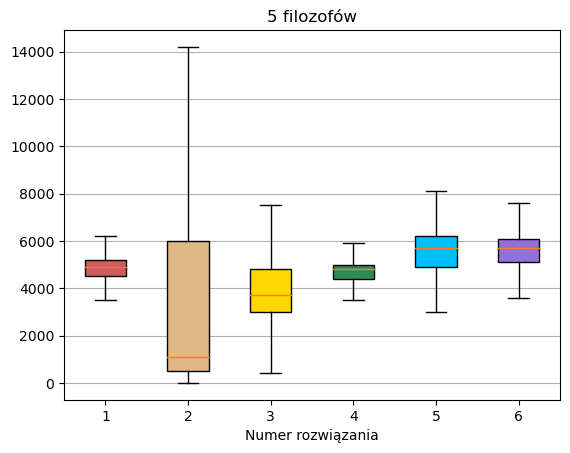

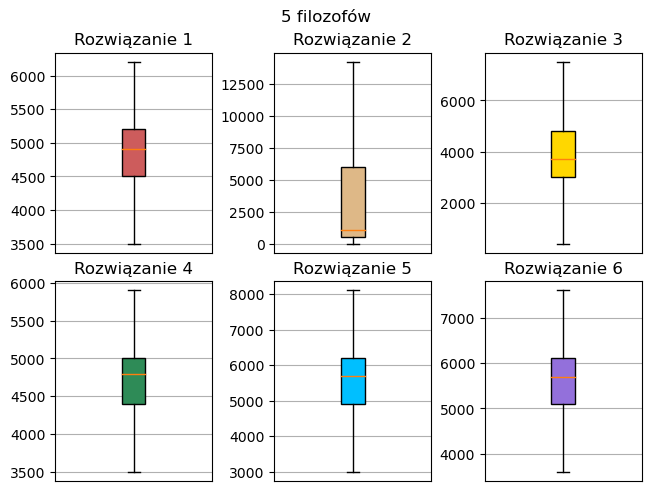

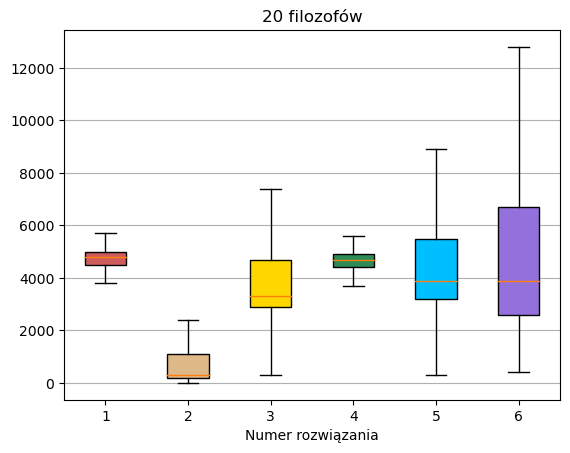

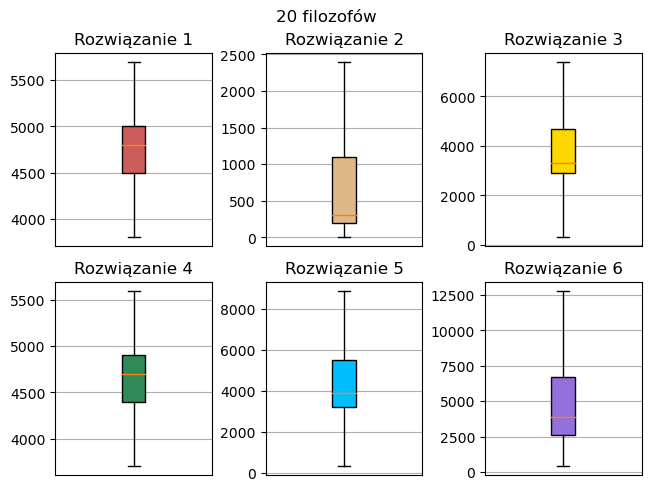

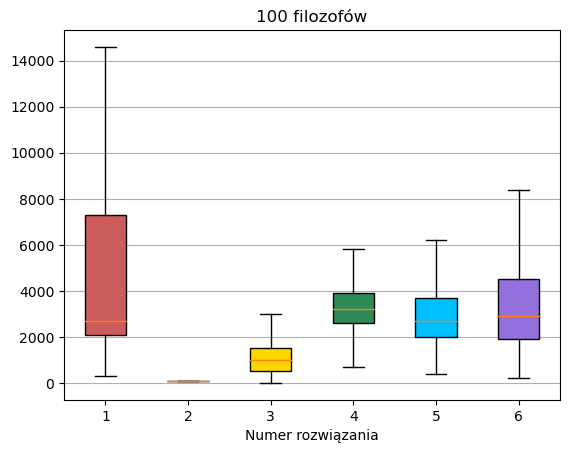

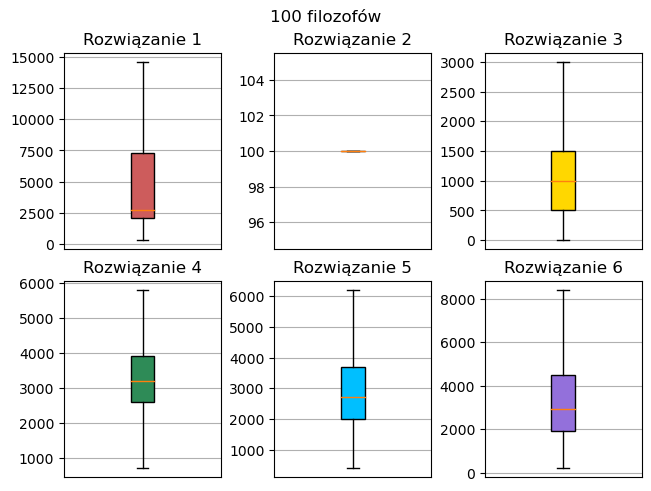

In [ ]:
for i, n in enumerate([5,20,100]):    
    fig, ax = plt.subplots()
    bplot=ax.boxplot(data_complex[i], sym='', patch_artist=True)
    ax.set_title(str(n)+" filozofów")
    ax.set_xlabel("Numer rozwiązania")
    ax.yaxis.grid(True)
    for patch, color in zip(bplot['boxes'], colors):
        patch.set_facecolor(color)
    plt.savefig("plots/bplot_byn"+str(n)+".png")

    fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3, layout="constrained")
    fig.suptitle(str(n)+" filozofów")
    axes=(ax1, ax2, ax3, ax4, ax5, ax6)
    for j, ax_n in enumerate(axes):
        bplot=ax_n.boxplot(data_complex[i][j], sym='', patch_artist=True, boxprops = dict(facecolor = colors[j]))
        ax_n.set_title("Rozwiązanie "+str(j+1))
        ax_n.xaxis.set_visible(False)
        ax_n.yaxis.grid(True)
    plt.savefig("plots/bplot_byn_un"+str(n)+".png")

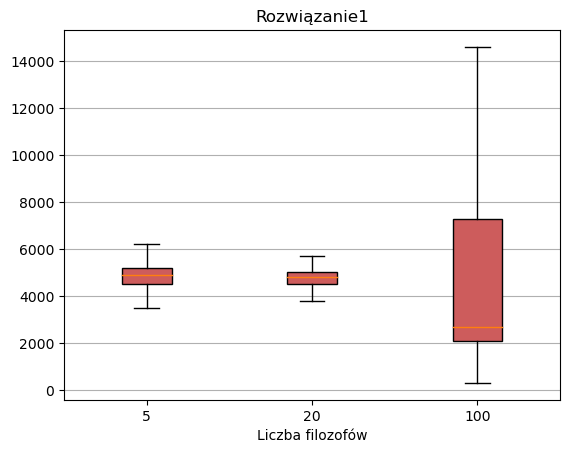

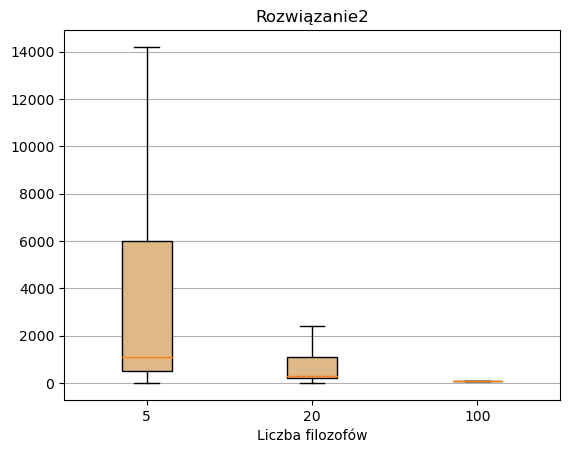

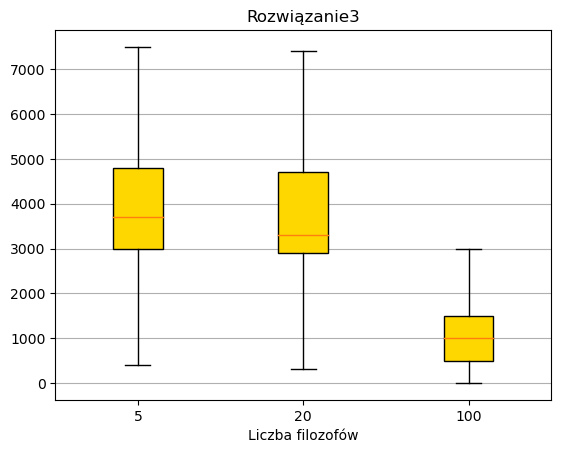

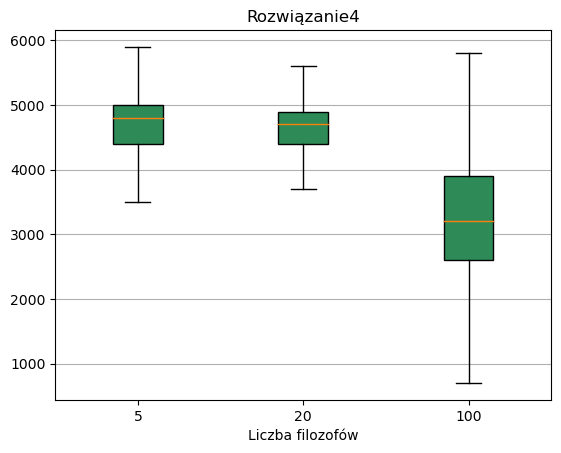

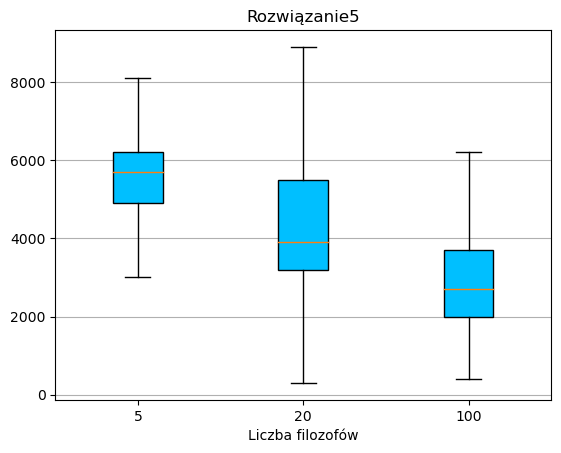

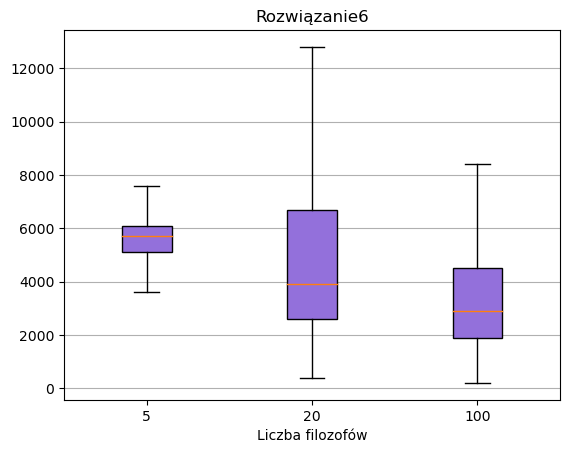

In [ ]:
for i in range(6):    
    fig, ax = plt.subplots()
    bplot=ax.boxplot((data_complex[0][i],data_complex[1][i],data_complex[2][i]), sym='', patch_artist=True, labels=[5, 20, 100])
    ax.set_title("Rozwiązanie"+str(i+1))
    ax.set_xlabel("Liczba filozofów")
    ax.yaxis.grid(True)
    for patch in bplot['boxes']:
        patch.set_facecolor(colors[i])
    plt.savefig("plots/bplot_bysol"+str(i)+".png")
